# Investigation of Netflix Movies and TV shows

<div style = "padding: 2em">
<img style="width: 800%"
     src="https://cdn.mos.cms.futurecdn.net/nweoCVrjc376xm23LGVkN3-970-80.jpg.webp" />
</div>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
%config InlineBackend.figure_formats = ['svg']

## 1. Loading the dataset

In [2]:
#load data using pandas read_csv function
netflix_data = pd.read_csv('./netflix_data.csv', index_col=[0])

In [3]:
#show the first five rows
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Basic Infomation about the dataset

In [4]:
#shape of data
netflix_data.shape

(8807, 11)

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


<AxesSubplot:title={'center':'Null values in each variable'}, xlabel='Variables', ylabel='No. of Nulls'>

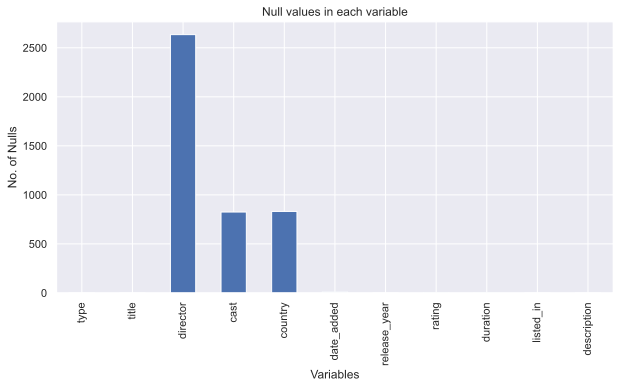

In [6]:
#Check for null values and show which variables in the datasets has null values
netflix_data.isnull().sum().plot(kind='bar', figsize=(10, 5),
                                 title='Null values in each variable', xlabel='Variables', ylabel='No. of Nulls')

In [7]:
#check for duplicate rows
print(f'Number of duplicate rows = {netflix_data.duplicated().sum()}')

Number of duplicate rows = 0


#### Summary 
<p>
    <ul> There are 8807 observations(movies) with 12 features </ul>
    <ol> The director, cast and country column have a considerable amount of null values </ol>
    <ol> No duplicates </ol>
    <ol> Datasets is based on movies from 1995 to 2021 </ol>
</p>

## 3. Data Preparation

<p style = "font-size: 16px"> <span style="font-size: 24px; margin-left: 23px; font-weight: bold;">a.</span>
    <span style="font-size: 20px; margin-left: 23px; font-weight: 20px;">Handling Missing Values:  </span>Drop the variables that may not be neccessary for our analysis. The <code>director</code> column contains 30% null values and the <code>cast</code> 9%. The <code>director</code> and <code>cast</code> variables are not important in this analysis.

The For the <code>country</code> column which has categorical values, we'll replace the null values with the mode (highest occurance)</p>

In [8]:
#drop the director, cast and date_added columns column
netflix_df = netflix_data.drop(['director', 'cast', 'date_added'], axis=1)

In [9]:
#replace the null values in the country column with the mode (highest occurance)
#in this case, the mode is United States with 25000+ production
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

In [10]:
#check for nulls
netflix_df.isnull().sum()

type            0
title           0
country         0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [11]:
#show the rows with null values as duration
netflix_df[netflix_df['duration'].isnull()]

,type,title,country,release_year,rating,duration,listed_in,description
show_id,,,,,,,,
s5542,Movie,Louis C.K. 2017,United States,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,United States,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


<p style = 'font-size: initial'><span style= "color: red"></span>HellBoooo !!!!!!!!!! From the frame above, we could detect an error. The <code>duration</code> column was filled in <code>rating</code> column. We'll manually fillup these null values with the actual value</p>

In [12]:
#replace the NaN in the duration column with the values in rating column respectively
#replace the rating
for index, row in netflix_df[netflix_df['duration'].isnull()].iterrows():
    netflix_df.loc[index, 'duration'] = row['rating']
    #replace the corresponding ratings with the mode (highest occurance of ratings)
    netflix_df.loc[index, 'rating'] = netflix_df['rating'].mode()[0]

In [13]:
netflix_df.isnull().sum()

type            0
title           0
country         0
release_year    0
rating          4
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
#show null values in rating column
netflix_df[netflix_df['rating'].isnull()]

,type,title,country,release_year,rating,duration,listed_in,description
show_id,,,,,,,,
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,Japan,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,Australia,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Italy,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [15]:
#distinct ratings
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

<p style = "font-family: Garamond; font-size: 20px">From the frame above we could see some movies and shows have no rating. But a look at the third row shows that it's likey to be rated for kids of all ages, hence we shall manually change the rating for this show to <code>TV-Y</code>. The remaining three shows with NaN as rating will be replaced with <code>UR</code>: meaning, unrated: not rated 

#### Below are meanings to the rating from IBMD.....

<div style = "line-height: 14px; font-size: 15px">
    
* TV-Y: This program is designed to be appropriate for all children

* TV-Y7: This program is designed for children age 7 and above

* TV-G: This program is suitable for all ages.

* TV-PG: This program contains material that parents may find unsuitable for younger children (hence, Parental Guidance)

* TV-14: This program contains some material that many parents would find unsuitable for children under 14 years of age.

* TV-MA: This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

* G: This program is suitable for all ages.

* NC-17: unsuitable for children under 17.

* NR: not rated.

* PG: may find unsuitable for younger children. I would say it is the same as TV-PG

* PG-13: for children over 13.

* R: restricted, only for children over 12.

* TV-Y7-FV: Fantasy violence (exclusive to the TV-Y7 rating)

* UR: not rated, as in (unrated)</div>

</p>

In [16]:
#replace the NaN for the row with id: s7313 with TV-Y: for kids
netflix_df.loc['s7313', 'rating'] = 'TV-Y'

#fill NaN in rating with UR: unrated, not rated
for index, row in netflix_df[netflix_df['rating'].isnull()].iterrows():
    netflix_df.loc[index, 'rating'] = 'UR'

In [17]:
#check fo nulls
netflix_df.isnull().sum()

type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
netflix_df.head()

,type,title,country,release_year,rating,duration,listed_in,description
show_id,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


d. change dtype<p style = "font-size: 16px"> <span style="font-size: 24px; margin-left: 23px; font-weight: bold;">c.</span>
    <span style="font-size: 20px; margin-left: 23px; font-weight: 20px;">Reformatting:  </span>The <code>duration</code> column contains texts like 'min' and 'Seasons'. We'll remove this texts, so that only numbers representing the duration are left. We'll also change the datatype of the this variable to integer

In [19]:
#remove strings from each value in the duration column
#change the resulting column dtype to integer
netflix_df['duration'] = netflix_df['duration'].str.replace('\D+', '').astype('int64')

C:\Users\Smart\AppData\Local\Temp\ipykernel_4700\4270244596.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  netflix_df['duration'] = netflix_df['duration'].str.replace('\D+', '').astype('int64')


In [20]:
netflix_df.dtypes

type            object
title           object
country         object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
dtype: object

* <p style = "font-size: 19px">Create new columns <code>genre</code> and <code>keywords</code> from the <code>listed_in</code> and <code>description</code>columns. A look at the variable shows that the genre of each show or movie is likely to be the first word before a comma. We'll take up words more with more than 3 characters from the description column as keywords</p>

In [21]:
#create a new column representing the genre movies and shows from the listed_in column
netflix_df['genre'] = netflix_df['listed_in'].apply(lambda x: x.split(',')[0])
netflix_df.head()

,type,title,country,release_year,rating,duration,listed_in,description,genre
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
s3,TV Show,Ganglands,United States,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows
s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries
s5,TV Show,Kota Factory,India,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows


In [22]:
#create a function to get the keywords from a string
def get_keywords(string):
    '''function gets the keywords from  of strings: keywords are words with atleast 4 characters'''
    keys = np.array(np.array(string.split()))
    return [key for key in keys if len(key) >= 4]

#create a new column, keywords, from the description column to hold the keywords in each descripiton: use the get_keyword function
netflix_df['keywords'] = netflix_df['description'].apply(lambda x: get_keywords(x))

#drop the description and listed_in column: these are no more important for this analysis as we have alternative columns: genre and keywords
netflix_df = netflix_df.drop(['listed_in', 'description'], axis=1)

In [23]:
netflix_df.head()

,type,title,country,release_year,rating,duration,genre,keywords
show_id,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90,Documentaries,"[father, nears, life,, filmmaker, Kirsten, Joh..."
s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2,International TV Shows,"[After, crossing, paths, party,, Cape, Town, t..."
s3,TV Show,Ganglands,United States,2021,TV-MA,1,Crime TV Shows,"[protect, family, from, powerful, drug, lord,,..."
s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1,Docuseries,"[Feuds,, flirtations, toilet, talk, down, amon..."
s5,TV Show,Kota Factory,India,2021,TV-MA,2,International TV Shows,"[city, coaching, centers, known, train, India’..."


# 4. Exploratory Data Analysis

* <p style = "font-size: 18px">Movie or TV shows, which dominates the netflix dataset ?</p>

<AxesSubplot:ylabel='type'>

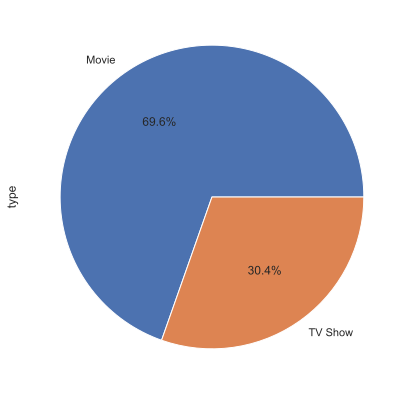

In [24]:
fig = plt.subplots(figsize=(13, 7))
netflix_df['type'].value_counts().plot.pie( autopct='%.1f%%')

<p style = "font-size: 18px">The duration of TV-shows are measured in seasons, while movies are measured in minutes(or hours). Hence for analysis involving duration, we'll filter out the datasets when neccessary for each analysis</p>

In [25]:
#from the dataset, select movies only
movie_df = netflix_df[netflix_data.type == 'Movie']

#select TV-shows only
tv_shows = netflix_df[netflix_df.type == 'TV Show']

* <p style = "font-size: 18px">Show how movie durations changes over the years. Does the genre of a movie affect the duration ?</p>

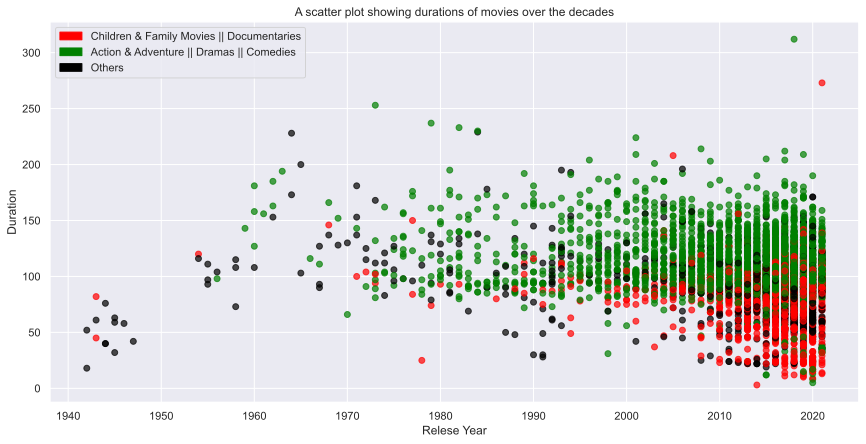

In [26]:
#plot a scatter plot between the release_year and duration for netflix movies
fig = plt.subplots(figsize=(14.5, 7))
#select only movies
movie_df = netflix_df[netflix_df['type'] == 'Movie']

#initialize empty list: to hold list of different colors for each genre type
colors = []

#loop through the movie data
for index, row in movie_df.iterrows() :
    if row['genre'] in ['Children & Family Movies', 'Documentaries']:
        colors.append('red')
    elif row['genre'] in ['Dramas', 'Comedies',
       'Action & Adventure']:
        colors.append('green')
    else:
        colors.append('black')
    

_  = plt.scatter(movie_df['release_year'], movie_df['duration'], c = colors, alpha = 0.7)
plt.xlabel('Relese Year')
plt.ylabel('Duration')
plt.title('A scatter plot showing durations of movies over the decades')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Children & Family Movies || Documentaries')
blue_patch = mpatches.Patch(color='green', label='Action & Adventure || Dramas || Comedies')
black_patch = mpatches.Patch(color='black', label='Others')

plt.legend(handles=[red_patch, blue_patch, black_patch])

plt.show()

<AxesSubplot:title={'center':'The distribution of the Netflix movie durations'}, ylabel='Frequency'>

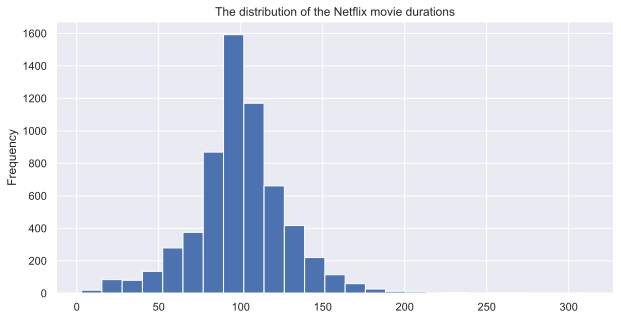

In [27]:
#plot the distribution of movie durations only
movie_df['duration'].plot(kind='hist', bins=25,
                          title='The distribution of the Netflix movie durations', grid=True,
                          figsize=(10,5), xlabel='Durations')

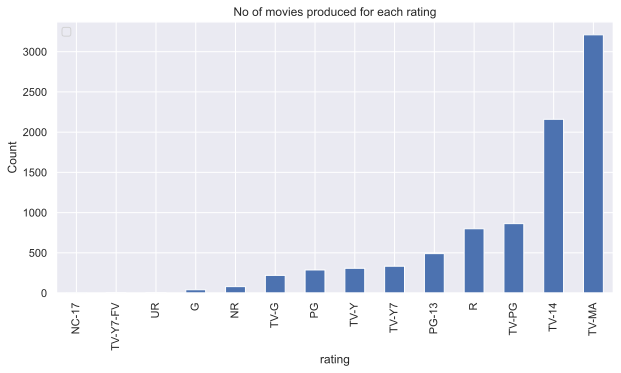

In [28]:
netflix_df.groupby('rating')[['title']].count().sort_values('title').plot(kind='bar', figsize=(10, 5),
                                             title='No of movies produced for each rating', ylabel='Count')
plt.legend('')

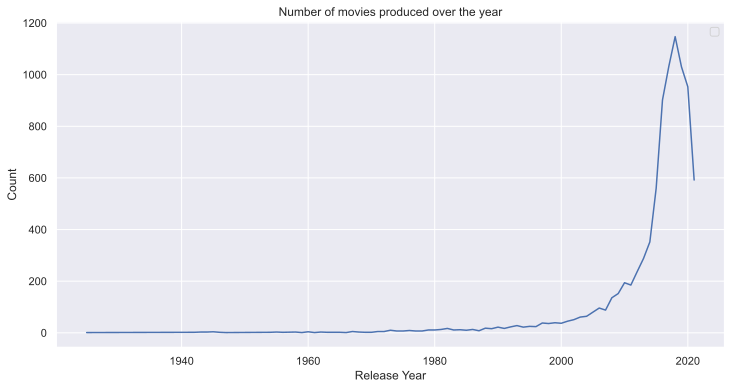

In [29]:
netflix_df.reset_index().pivot_table(index='release_year', values='show_id', aggfunc=[len]).plot(kind='line',
                                                    title='Number of movies produced over the year', ylabel='Count', 
                                                    xlabel='Release Year', figsize=(12, 6), grid=True)
plt.legend('')

<AxesSubplot:title={'center':'Season Count for TV-Shows'}, xlabel='Duration', ylabel='Count'>

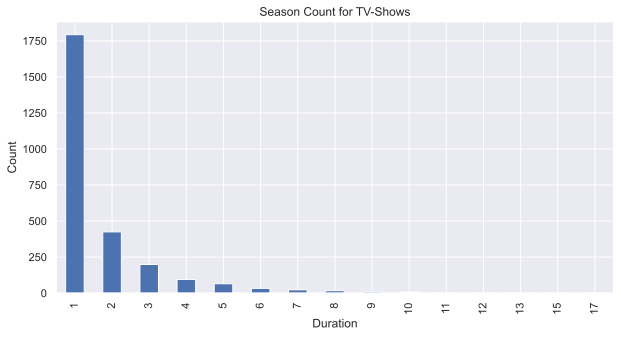

In [30]:
#select TV-shows only
tv_shows = netflix_df[netflix_df.type == 'TV Show']
tv_shows.reset_index().groupby('duration')['show_id'].count().plot(kind='bar',
                                            title = 'Season Count for TV-Shows',
                                            ylabel='Count', xlabel='Duration', figsize=(10, 5))

<AxesSubplot:title={'center':'Most popular genres on Netflix'}, xlabel='Genre', ylabel='Count'>

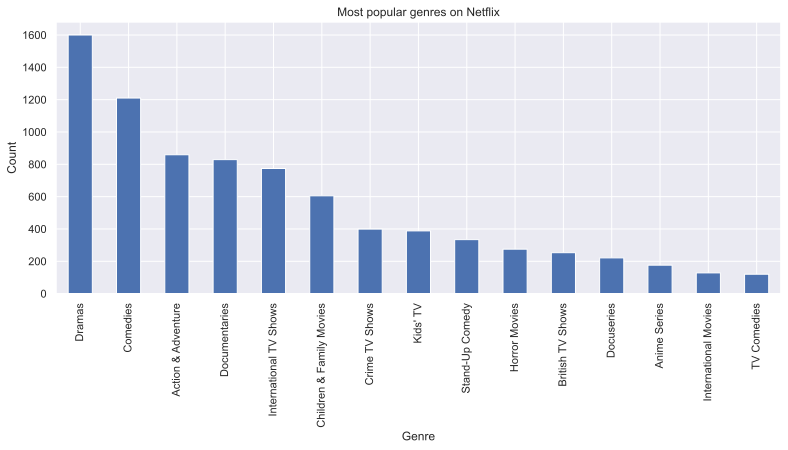

In [31]:
#select top 10 genres
from collections import Counter
genre_counter = Counter(netflix_df.genre)
pd.DataFrame(genre_counter.most_common(15)).set_index(0).plot(kind='bar', figsize=(13, 5),
                                                title='Most popular genres on Netflix', legend=False,
                                                xlabel='Genre', ylabel='Count')

<AxesSubplot:title={'center':'Top 10 Movie producing countries'}, xlabel='Country', ylabel='No. of movies produced'>

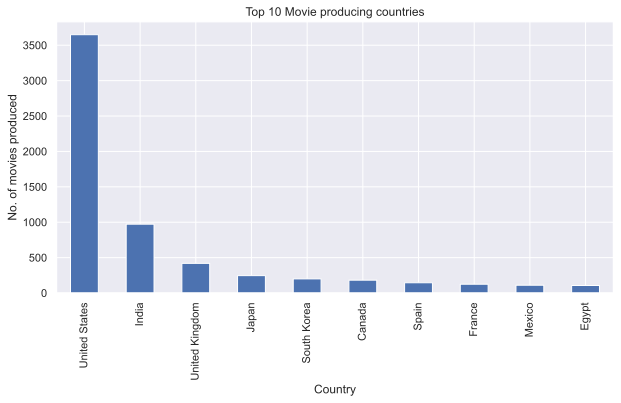

In [32]:
#plot top movie producing countries
netflix_df['country'].value_counts()[:10].plot(kind='bar', title='Top 10 Movie producing countries',
                                              xlabel='Country', ylabel='No. of movies produced', figsize=(10,5))

* <p style = "font-size: 18px">What are the most popular keywords in netflix movies and TV-Shows</p>

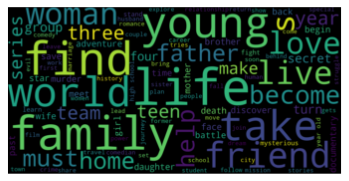

In [33]:
from wordcloud import WordCloud

allwords = []
for i in netflix_df.keywords:
    allwords.extend(i)
text = ' '.join(allwords)
wordcloud = WordCloud(max_font_size=300, max_words=100, width=2000, height=1000).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* <p style = "font-size: 18px">Get the keywords most popular genres</p>

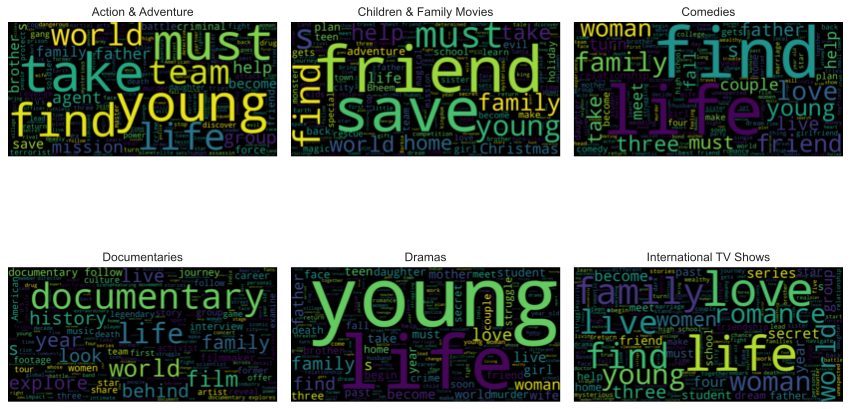

In [34]:
#get the 5 most popular genres
most_popular_genres = netflix_df[netflix_df.genre.isin(['Dramas', 'Comedies', 'Action & Adventure', 'Documentaries', 'Children & Family Movies',
                                                       'International TV Shows'])]

fig, ax = plt.subplots(2, 3, figsize=(15, 8))
fig.subplots_adjust(hspace = .3, wspace=.05)
bx = ax.ravel()
for index, row in most_popular_genres.groupby('genre')[['keywords']].sum().reset_index().iterrows():
    wc = WordCloud(width=2000, height=1000).generate(' '.join(row['keywords']))
    bx[index].imshow(wc, interpolation='bilinear')
    bx[index].set_title(row['genre'])
    bx[index].axis('off')

# <p style = "font-size: 28px">Summary:</p> 

<p>
    <ul style = "font-size: 20px;
                 line-height: 3rem;"> 
        <li>There are more Movies than TV-shows on Netflix with movies more than twice the TV-Shows, with United States producing majority of the movies, followed by India
            While Movies durations are measured in minutes, the TV-shows are measured in no of seasons</li>
        <li>Movie genre has an effect on the duration. It is seen from the scatter plot that movies with duration ranging from 20minutes to 2hr are more of  <code>Children and Family Movies</code> and <code>Documentaries</code> while <code>Drama, Comedies, Action and Adventure</code> are seen on the upper part of the scatter plot, which shows that they these genres lasts longer in duration</li>
        <li>There is a sudden change in the year 2000, where the number of 
movies produced
where the numbers sky-rocketed. This increase
continued and reached its peak in 2018 and reduced in subsequent years
up to 2020</li>
        <li>The distribution of the duration for movies shows a normal distribution: majority of the movies has duration ranging from 60minutes to 120minutes. For TV-shows, most are one-seasonal, with very few having 2 and 3 seasons</li>
        <li>Movies and Shows are more of Adults and teenagers. The top 3 rating are :
                    <ul>
                        <li>- TV-PG: Program contains unsuitable for younger children (hence, Parental Guidance)

</li>
                        <li>- TV-14: Program  unsuitable for children under 14 years of age.</li>
                        <li>- R: Restricted only for children over 12</li>         
                    </ul>
        This shows that Netflix may not be an appropriate platform for Kids and Children
        </li>
<li> 
Drama, Comedies, Action and Adventure, are
the top three genres on Netflix</li>
<li> 
Most popular keywords from the movie description are: <code> Young, Family, Woman, Life, love Live, Friend </code></li>
   </ul>
   
</p>